In [1]:
import pandas as pd

df = pd.read_csv("../data/processed/heatwave_data.csv")
df.head()


,Latitude,Longitude,Value
0,81.79986,-179.900139,-999.0
1,81.79986,-179.800139,-999.0
2,81.79986,-179.700139,-999.0
3,81.79986,-179.600139,-999.0
4,81.79986,-179.500139,-999.0


In [2]:
df.info()
df.describe()
df.isna().sum()
(df == -999.0).sum()  # Counts placeholder values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3710569 entries, 0 to 3710568
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Latitude   float64
 1   Longitude  float64
 2   Value      float64
dtypes: float64(3)
memory usage: 84.9 MB


Latitude           0
Longitude          0
Value        3644660
dtype: int64

In [3]:
# Filter out -999.0 which likely indicates missing data
df = df[df["Value"] != -999.0]
df.reset_index(drop=True, inplace=True)


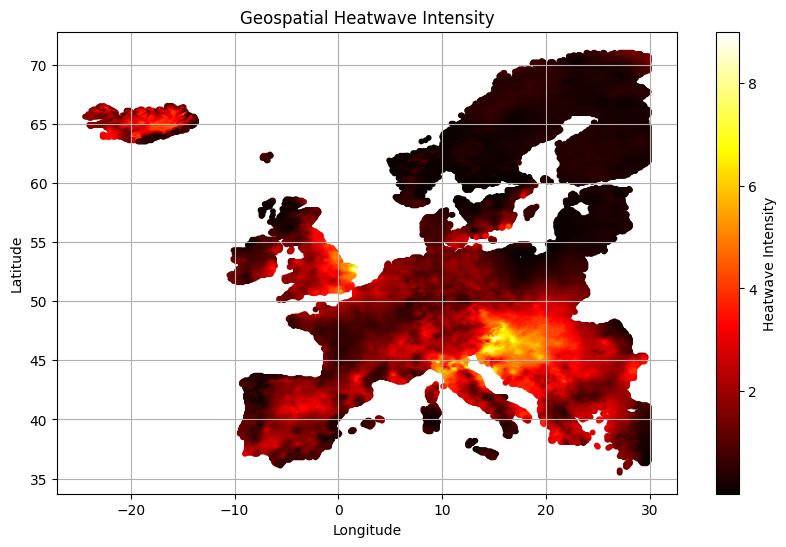

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df["Longitude"], df["Latitude"], c=df["Value"], cmap="hot", s=10)
plt.colorbar(scatter, label="Heatwave Intensity")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geospatial Heatwave Intensity")
plt.grid(True)
plt.show()


In [5]:
import pandas as pd

# Load data
df = pd.read_csv('../data/processed/heatwave_data.csv')

# Basic info
print(df.info())
print(df.describe())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3710569 entries, 0 to 3710568
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Latitude   float64
 1   Longitude  float64
 2   Value      float64
dtypes: float64(3)
memory usage: 84.9 MB
None
           Latitude     Longitude         Value
count  3.710569e+06  3.710569e+06  3.710569e+06
mean   3.029986e+01 -1.396090e-04 -9.812297e+02
std    2.976240e+01  1.038942e+02  1.321451e+02
min   -2.120014e+01 -1.799001e+02 -9.990000e+02
25%    4.499861e+00 -9.000014e+01 -9.990000e+02
50%    3.029986e+01 -1.396090e-04 -9.990000e+02
75%    5.609986e+01  8.999986e+01 -9.990000e+02
max    8.179986e+01  1.798999e+02  9.001429e+00
   Latitude   Longitude  Value
0  81.79986 -179.900139 -999.0
1  81.79986 -179.800139 -999.0
2  81.79986 -179.700139 -999.0
3  81.79986 -179.600139 -999.0
4  81.79986 -179.500139 -999.0


In [6]:
# Replace invalid temperature values
df['Value'] = df['Value'].replace(-999.0, pd.NA)

# Drop or analyze NaNs
print(df['Value'].isna().sum())
df = df.dropna(subset=['Value'])  # Drop rows where 'Value' is missing


3644660


In [9]:
import pandas as pd

# Load the processed CSV file
df = pd.read_csv('../data/processed/heatwave_data.csv')


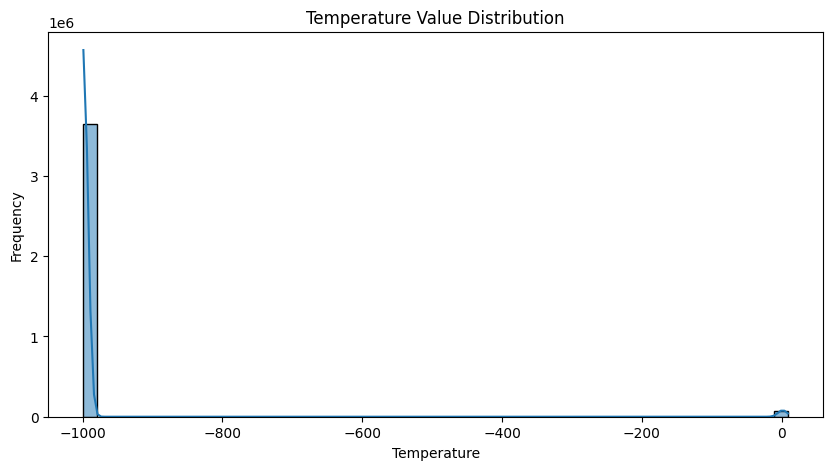

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['Value'], bins=50, kde=True)
plt.title('Temperature Value Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


In [11]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3710569 entries, 0 to 3710568
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Latitude   float64
 1   Longitude  float64
 2   Value      float64
dtypes: float64(3)
memory usage: 84.9 MB


Latitude     0
Longitude    0
Value        0
dtype: int64

In [13]:
print(df.columns)


Index(['Latitude', 'Longitude', 'Value'], dtype='object')


In [14]:
print(df.describe())


           Latitude     Longitude         Value
count  3.710569e+06  3.710569e+06  3.710569e+06
mean   3.029986e+01 -1.396090e-04 -9.812297e+02
std    2.976240e+01  1.038942e+02  1.321451e+02
min   -2.120014e+01 -1.799001e+02 -9.990000e+02
25%    4.499861e+00 -9.000014e+01 -9.990000e+02
50%    3.029986e+01 -1.396090e-04 -9.990000e+02
75%    5.609986e+01  8.999986e+01 -9.990000e+02
max    8.179986e+01  1.798999e+02  9.001429e+00


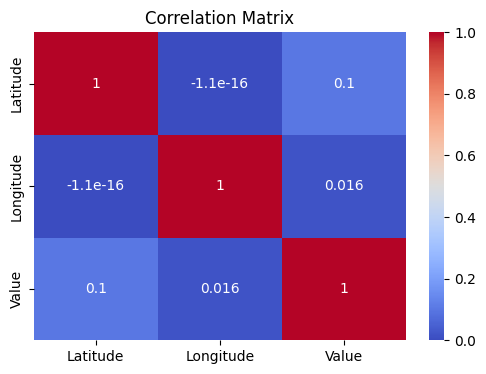

In [15]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


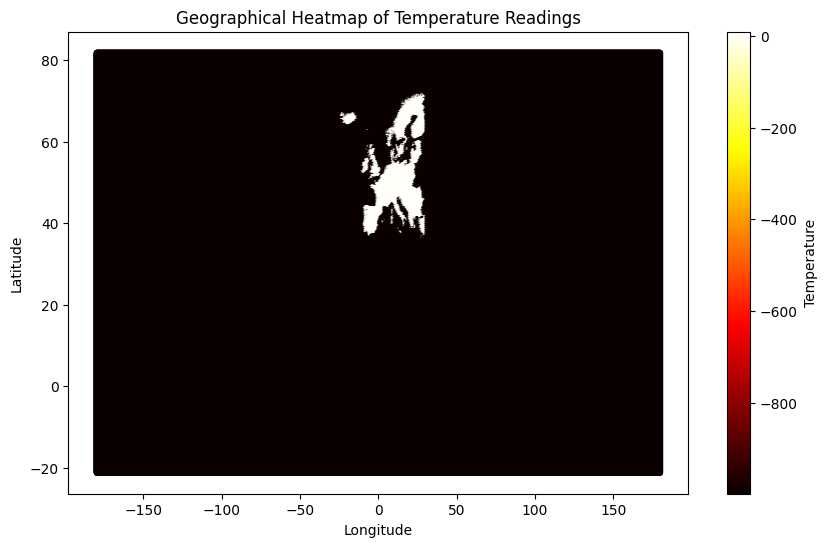

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Value'], cmap='hot', s=10)
plt.colorbar(label='Temperature')
plt.title('Geographical Heatmap of Temperature Readings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [17]:
df['Heatwave'] = df['Value'].apply(lambda x: 1 if x >= 40 else 0)
df['Heatwave'].value_counts()


Heatwave
0    3710569
Name: count, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and labels
X = df[['Latitude', 'Longitude', 'Value']]
y = df['Heatwave']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
# Check how many positive and negative samples exist
df['Heatwave'].value_counts()


Heatwave
0    3710569
Name: count, dtype: int64

In [22]:
# Fix threshold to use 90th percentile (top 10% hottest temps)
threshold = df['Value'].quantile(0.90)

# Relabel correctly: only top 10% are heatwaves
df['Heatwave'] = (df['Value'] >= threshold).astype(int)

# Check counts again
df['Heatwave'].value_counts()


Heatwave
1    3710569
Name: count, dtype: int64

In [25]:
# Remove placeholder values (-999) that indicate missing/invalid temperature
df = df[df['Value'] > -100]  # Removing -999 and similar outliers


In [26]:
print("Min:", df['Value'].min())
print("Max:", df['Value'].max())
print("90th Percentile Threshold:", df['Value'].quantile(0.90))


Min: 4.13551763824396e-08
Max: 9.001429156545324
90th Percentile Threshold: 3.213144319519451


In [27]:
threshold = df['Value'].quantile(0.90)
df['Heatwave'] = (df['Value'] >= threshold).astype(int)
print(df['Heatwave'].value_counts())


Heatwave
0    59318
1     6591
Name: count, dtype: int64


In [28]:
X = df[['Latitude', 'Longitude', 'Value']]
y = df['Heatwave']


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[11864     0]
 [    2  1316]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11864
           1       1.00      1.00      1.00      1318

    accuracy                           1.00     13182
   macro avg       1.00      1.00      1.00     13182
weighted avg       1.00      1.00      1.00     13182



In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


[[11864     0]
 [    1  1317]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11864
           1       1.00      1.00      1.00      1318

    accuracy                           1.00     13182
   macro avg       1.00      1.00      1.00     13182
weighted avg       1.00      1.00      1.00     13182



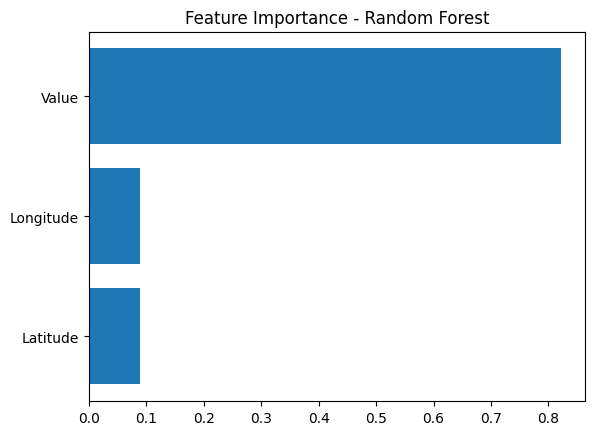

In [34]:
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.title("Feature Importance - Random Forest")
plt.show()


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluation
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


[[11864     0]
 [    1  1317]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11864
           1       1.00      1.00      1.00      1318

    accuracy                           1.00     13182
   macro avg       1.00      1.00      1.00     13182
weighted avg       1.00      1.00      1.00     13182



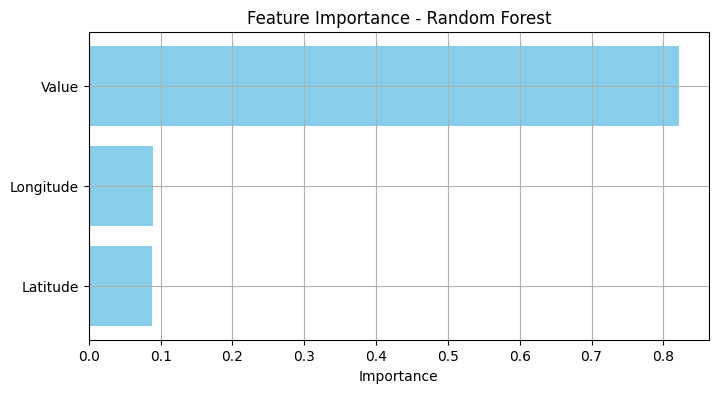

In [36]:
import matplotlib.pyplot as plt

# Extract feature importances
importances = rf_model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(8, 4))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Importance")
plt.title("Feature Importance - Random Forest")
plt.grid(True)
plt.show()


In [37]:
import numpy as np
import pandas as pd

# Example test inputs (Latitude, Longitude, Value)
new_data = pd.DataFrame({
    'Latitude': [28.61, 19.07, 13.08],     # Delhi, Mumbai, Chennai
    'Longitude': [77.23, 72.87, 80.27],
    'Value': [45.0, 38.5, 41.2]            # Example observed temperatures
})

# Scale the new inputs using the same scaler used during training
new_data_scaled = scaler.transform(new_data)

# Predict
predictions = model.predict(new_data_scaled)

# Display results
new_data['Heatwave_Predicted'] = predictions
new_data


,Latitude,Longitude,Value,Heatwave_Predicted
0,28.61,77.23,45.0,1
1,19.07,72.87,38.5,1
2,13.08,80.27,41.2,1


In [38]:
# Simulate alert messages based on prediction
def generate_alert_message(row):
    if row['Heatwave_Predicted'] == 1:
        return f"⚠️ Heatwave Alert! High temperature of {row['Value']}°C detected at ({row['Latitude']}, {row['Longitude']}). Stay hydrated and avoid outdoor activities."
    else:
        return f"✅ Temperature normal at ({row['Latitude']}, {row['Longitude']}) - {row['Value']}°C. No heatwave detected."

# Apply alert generator
new_data['Alert_Message'] = new_data.apply(generate_alert_message, axis=1)

# Show alerts
new_data[['Latitude', 'Longitude', 'Value', 'Alert_Message']]


,Latitude,Longitude,Value,Alert_Message
0,28.61,77.23,45.0,⚠️ Heatwave Alert! High temperature of 45.0°C ...
1,19.07,72.87,38.5,⚠️ Heatwave Alert! High temperature of 38.5°C ...
2,13.08,80.27,41.2,⚠️ Heatwave Alert! High temperature of 41.2°C ...


In [39]:
import joblib

# Save model
joblib.dump(model, 'heatwave_model.pkl')

# Save scaler
joblib.dump(scaler, 'scaler.pkl')

print("✅ Model and scaler saved successfully.")


✅ Model and scaler saved successfully.


In [41]:
import os

# Create directories if they don't exist
os.makedirs('app/backend', exist_ok=True)

# Now save the model
joblib.dump(model, 'app/backend/model.pkl')


['app/backend/model.pkl']

In [42]:
import joblib

# Save the model to the Flask backend folder
joblib.dump(model, 'app/backend/model.pkl')


['app/backend/model.pkl']